# 기본 패키지 가져오기


In [2]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기

In [3]:
#_centered 이게 미리 설치 되어 있어서 충돌이 일어나 모듈 import가 안되서 함수로 따로 만듬
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [4]:
# 데이터셋 
from sktime.datasets import load_airline
y = load_airline()


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

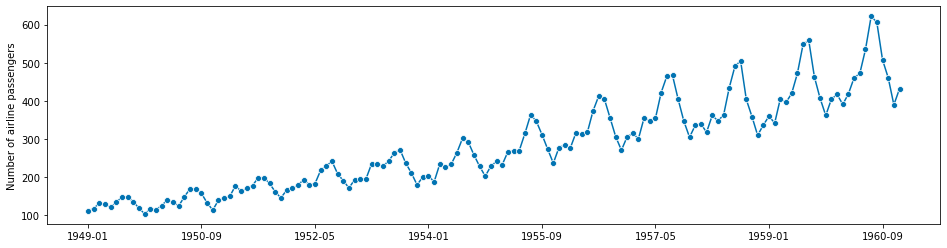

In [5]:
# 그래프
from sktime.utils.plotting import plot_series

plot_series(y)

In [6]:
# 월별로 되어있음
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [7]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [8]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

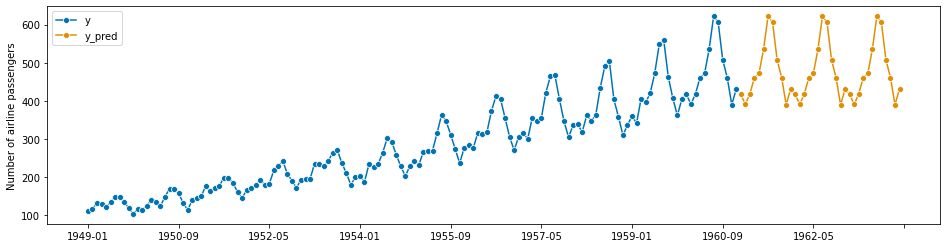

In [9]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [11]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [14]:
type(y_pred)

pandas.core.series.Series

In [15]:
from sktime.datasets import load_longley

In [34]:
y = load_longley()

In [37]:
y

(Period
 1947    60323.0
 1948    61122.0
 1949    60171.0
 1950    61187.0
 1951    63221.0
 1952    63639.0
 1953    64989.0
 1954    63761.0
 1955    66019.0
 1956    67857.0
 1957    68169.0
 1958    66513.0
 1959    68655.0
 1960    69564.0
 1961    69331.0
 1962    70551.0
 Freq: A-DEC, Name: TOTEMP, dtype: float64,
         GNPDEFL       GNP   UNEMP   ARMED       POP
 Period                                             
 1947       83.0  234289.0  2356.0  1590.0  107608.0
 1948       88.5  259426.0  2325.0  1456.0  108632.0
 1949       88.2  258054.0  3682.0  1616.0  109773.0
 1950       89.5  284599.0  3351.0  1650.0  110929.0
 1951       96.2  328975.0  2099.0  3099.0  112075.0
 1952       98.1  346999.0  1932.0  3594.0  113270.0
 1953       99.0  365385.0  1870.0  3547.0  115094.0
 1954      100.0  363112.0  3578.0  3350.0  116219.0
 1955      101.2  397469.0  2904.0  3048.0  117388.0
 1956      104.6  419180.0  2822.0  2857.0  118734.0
 1957      108.4  442769.0  2936.0  2798

In [39]:
type(y)

tuple

In [40]:
_,y = load_longley()

In [41]:
_

Period
1947    60323.0
1948    61122.0
1949    60171.0
1950    61187.0
1951    63221.0
1952    63639.0
1953    64989.0
1954    63761.0
1955    66019.0
1956    67857.0
1957    68169.0
1958    66513.0
1959    68655.0
1960    69564.0
1961    69331.0
1962    70551.0
Freq: A-DEC, Name: TOTEMP, dtype: float64

In [42]:
y

,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.0,234289.0,2356.0,1590.0,107608.0
1948,88.5,259426.0,2325.0,1456.0,108632.0
1949,88.2,258054.0,3682.0,1616.0,109773.0
1950,89.5,284599.0,3351.0,1650.0,110929.0
1951,96.2,328975.0,2099.0,3099.0,112075.0
1952,98.1,346999.0,1932.0,3594.0,113270.0
1953,99.0,365385.0,1870.0,3547.0,115094.0
1954,100.0,363112.0,3578.0,3350.0,116219.0
1955,101.2,397469.0,2904.0,3048.0,117388.0


In [46]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = VAR()
forecaster.fit(y, fh=[1, 2,3])
# 예측되는 값

y_pred = forecaster.predict()

In [47]:
y_pred

,GNPDEFL,GNP
1963,121.688295,578514.398653
1964,124.353664,601873.015890
1965,126.847886,625411.588754
